# Principal Component Analysis
PCA is the last machine learning technique that we will be talking about in this repository!

The goal of PCA is to reduce the dimensionality of the feature vectors used in the algorithm. For example, given a 3d dataset, we make it 2d. Trying to analyze multi-dimensional data becomes very complicated very fast, so PCA is great for simplifying the data. Indeed, PCA reduces such data strategically and tries to retain as much information as possible. 

PCA tries to find a new set of variables, or principle components, which are linear combinations of the original variables. In linear algebra terms, the principle component is the largest eigenvalue's vector in which data is projected onto. Subsequent principal components are orthogonal to the previous one and try to capture the remaining variance.

Here are the steps to PCA:

1) Standardizing and centering the data.

Given a dataset with n observations and m variables, we can form a matrix X of size n x p (each row is an observation and each column is a variable). PCA will aim to find a matrix Z that maps X onto a new space Y, where Y has lower dimensionality than X. To center the data, each row is averaged: $x- mean$, and the z-score is found: $\frac{x - mean}{stddev}$

2) Computing the covariance matrix of the centered data.

The covariance matrix, $S$, is calculated as follows: $S = \frac{1}{n-1}XX^T$. Covariance is the measure of the total variation between 2 random variables. It is the most holistic measure of variance (in comparison to just, say, normal variance -although that can be seen through the diagonals anyway), so we use it for PCA.

3) Finding the eigenvalues and eigenvectors of $S$.

The eigenvectors of S are denoted $w1, w2, ...wn$ and the eigenvalues are $\lambda_1, \lambda_2,....\lambda_n$ We solve this optimization problem with Singular Value Decomposition, which decomposes X into: $X= \mathbf{U} \mathbf{\Sigma} \mathbf{V}^{T}$. U is a n x m matrix of left singular vectors, $\Sigma$ is a m x m diagonal matrix of singular values, and V is a n x n matrix of right singular vectors. 

4) Finding the principal components and reducing the dimensionality.

If we arrange the eigenvalues in decreasing order, the first k principal components directions' are given by the first eigenvector, then the second eigenvector, and so on (so the highest eigenvalues are chosen first). The principal components matrix thus produces this result: $Y = XZ$, where Z is the transformation matrix that holds the eigenvalue weights.  Matrix X is multiplied by Z and its projected onto Y, which is a lower dimension matrix.

![pca in a nutshell](https://media.licdn.com/dms/image/C4D12AQF2ZVi92nypDw/article-cover_image-shrink_720_1280/0/1520126718800?e=2147483647&v=beta&t=0WHgQqbRkQi6RpjIWTX9U8-lb00uG85tiPeFZ9L37hM)

PCA is really good for noise reduction and data visualization, as it simplifies the data into a more manageable size. It's a versatile tool used in many tools, including image processing, pattern recognition, and data analysis.


# Application



[Fashion-MNIST Source](https://www.kaggle.com/datasets/zalando-research/fashionmnist)

For this notebook, we will perform PCA on the fashion MNIST dataset!! 
What a fun way to end our machine learning tour!

Similar to the MNIST dataset, the fashion-MNIST dataset contains grayscale images of fashion items, instead of handwritten digits. Each image is a 28 x 28 px image of 10 classes:

0) T-shirt/top
1) Trouser
2) Pullover
3) Dress
4) Coat
5) Sandal
6) Shirt
7) Sneaker
8) Bag
9) Ankle boot

The fashion-MNIST dataset is enormous, and Git was giving me a ton of trouble when trying to push this to Github. As such, I've opted to only use the first 2000 entries of the test data, or else I would be living through a nightmare of Git documentation. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


df= pd.read_csv(r"C:\Users\faith\new577\INDE577\577repo\Supervised Learning\Datasets\fashion-mnist_test.csv")
print(df.head())

   label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      0       0       0       0       0       0       0       0       9   
1      1       0       0       0       0       0       0       0       0   
2      2       0       0       0       0       0       0      14      53   
3      2       0       0       0       0       0       0       0       0   
4      3       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0       8  ...       103        87        56         0         0         0   
1       0  ...        34         0         0         0         0         0   
2      99  ...         0         0         0         0        63        53   
3       0  ...       137       126       140         0       133       224   
4       0  ...         0         0         0         0         0         0   

   pixel781  pixel782  pixel783  pixel784  
0         0         0         

For the sake of this notebook, we will drop the labels column from the dataset in order to simulate an unsupervised learning scenario. Then, let's print out one of the images to see what it looks like!


new df shape: (1999, 784)


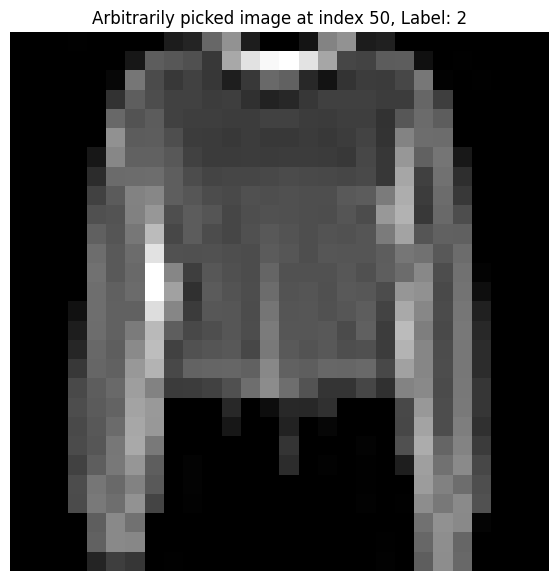

In [2]:
new_df= df.drop('label', axis=1)
print("new df shape:", new_df.shape)


#Separating the X and y. X represents all the columns, y_true represents the true labels
X = df.iloc[:, 1:785].values
y_true= df.iloc[:, 0].values




plt.figure(figsize=(7,7))
grid_data = new_df.iloc[50].values.reshape(28, 28)
plt.imshow(grid_data, interpolation="none", cmap="gray")
plt.title(f"Arbitrarily picked image at index 50, Label: {y_true[50]}")
plt.axis('off')
plt.show()

This is a pullover! Next, we will perform PCA on it.


In [4]:
# I got recommended to flatten these into 1D arrays, so I am doing it here
x_flat = X.reshape(X.shape[0], -1)


# standardizing the data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_flat)


print(f"original matrix shape: {new_df.shape}, standardized shape: {x_scaled.shape}")

original matrix shape: (1999, 784), standardized shape: (1999, 784)


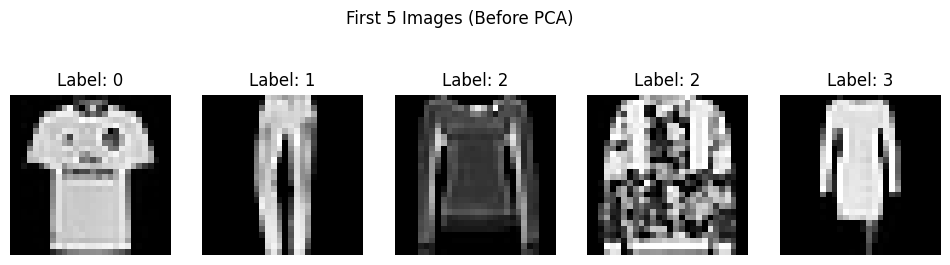

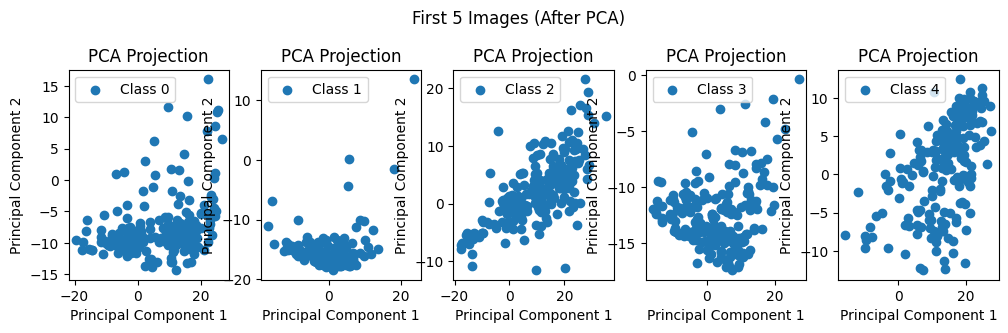

In [5]:
pca = PCA(n_components= 2)  # reduce to 2 principal components for visualization
x_train_pca = pca.fit_transform(x_scaled)

plt.figure(figsize=(12, 6))
for i in range(5):
    plt.subplot(2, 5, i+1)
    img = X[i].reshape(28, 28)
    plt.imshow(img, cmap='gray')
    plt.title(f'Label: {y_true[i]}')
    plt.axis('off')
plt.suptitle('First 5 Images (Before PCA)')
plt.show()




plt.figure(figsize=(12, 6))
for i in range(5):
    plt.subplot(2, 5, i + 1)
    plt.scatter(x_train_pca[y_true == i, 0], x_train_pca[y_true == i, 1], label=f'Class {i}')
    plt.title('PCA Projection')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()


plt.suptitle('First 5 Images (After PCA)')
plt.show()


We'll next do an analysis on how well this data is captured by our PCAs with explained variance ratios.

pca.explained_variance_ratio_ = [0.2245348  0.14370056]
per_var = [22.45 14.37] 



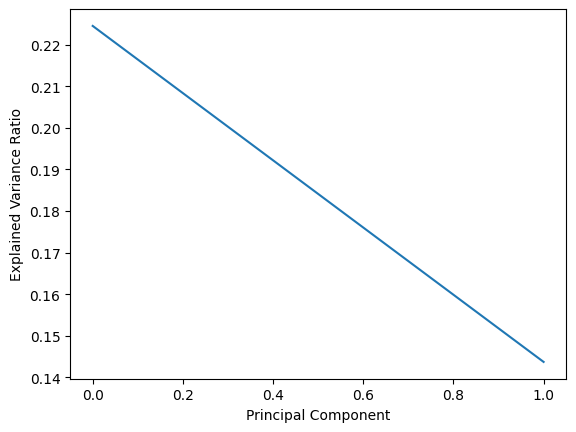

In [6]:
print(f"pca.explained_variance_ratio_ = {pca.explained_variance_ratio_}")


per_var = np.round(pca.explained_variance_ratio_*100, 2)
print(f"per_var = {per_var} \n")


plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()


The explained variance ratio measures how much the dataset's variance is captured by each principal component. For a dataset of this dimension, 22% and 15% of the data variance captured respectively is pretty solid, in my opinion.

Thank you for coming along the ride! This ends our tour of machine learning. Let's be Github friends if you've made it this far!